In [1]:
import cv2
from tifffile import imread, imsave
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

Populating the interactive namespace from numpy and matplotlib


/Users/prakash/anaconda/envs/py35forBobSeg/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['imsave', 'imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
src_img = imread('/Users/prakash/Desktop/TPS/Examples/image_time#0000016.tif')
des_img = imread('/Users/prakash/Desktop/TPS/Examples/image_time#0000016copy.tif')

In [3]:
tps = cv2.createThinPlateSplineShapeTransformer()

In [4]:
# sshape = np.array([[220,559.33331], [106,634],[410.66666,558.66669],[174.66666,554], [286.66669,444.66666], [48,622], [212.66667,708], [186.66667,630.66669], [189,299], [149,405], [351,723], [318,493], [290,619], [765,442], [628,421], [902,675], [845,511], [799,297], [956,337], [936,595], [673,347], [185,355], [731,312]], np.float32)
# tshape = np.array([[222,555], [103,633], [412,554], [177,547], [290,449], [51,626], [211,704], [188,626], [191,294], [143,410], [356,723], [318,498], [296,616], [756,447], [628,428], [909,674], [851,510], [797,291], [958,331], [933,590], [682,357], [191,352], [727,315]], np.float32)
# sshape = sshape.reshape(1,-1,2)
# tshape = tshape.reshape(1,-1,2)

In [5]:
sshape = np.array([[137,162], [113,287], [331,234]], np.float32)
tshape = np.array([[197,178], [139,291], [309,228]], np.float32)
sshape = sshape.reshape(1,-1,2)
tshape = tshape.reshape(1,-1,2)

In [6]:
matches = list()
for i in range(0, sshape.shape[1],1):
    matches.append(cv2.DMatch(i,i,0))
    

In [7]:
tps.estimateTransformation(sshape,tshape,matches)
print(tps.estimateTransformation(sshape,tshape,matches))

None


In [8]:
ret, tshape_ = tps.applyTransformation ((np.array([[135,166], [113,287], [331,234]], np.float32)).reshape(1,-1,2))
print(tshape_)

[[[194.28201 181.70544]
  [139.00002 291.00003]
  [308.99997 228.     ]]]


In [9]:
tps.estimateTransformation(tshape,sshape,matches)
print(tps.estimateTransformation(tshape,sshape,matches))

None


In [10]:
out_img = tps.warpImage(src_img)
np.asarray(out_img)
print(out_img.shape)
out_img.dtype

(474, 474)


dtype('uint16')

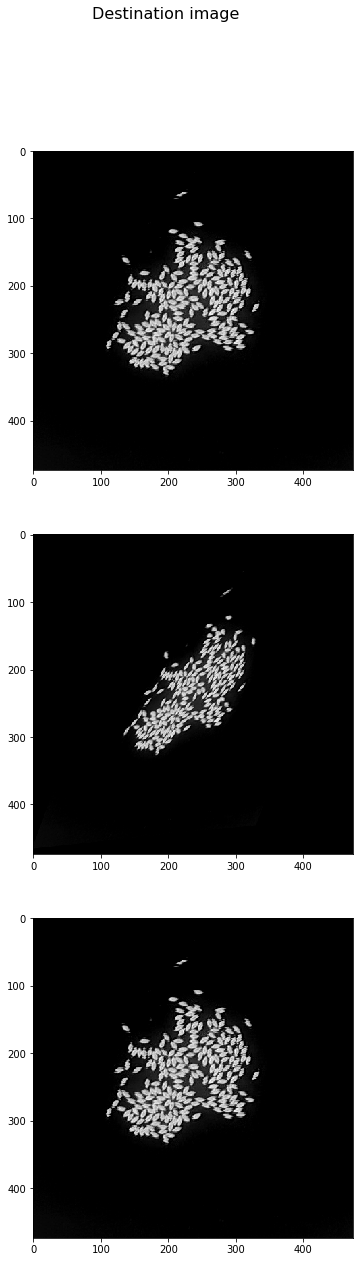

In [11]:
pylab.rcParams['figure.figsize'] = (30, 20)
fig = plt.figure()
ax = fig.add_subplot(311)
fig.suptitle('Source image ', fontsize=16)
ax.imshow(src_img, plt.get_cmap('gray'))
ax = fig.add_subplot(312)
fig.suptitle('Warped image ', fontsize=16)
ax.imshow(out_img, plt.get_cmap('gray'))
imsave("Warped.tif", out_img)
ax = fig.add_subplot(313)
fig.suptitle('Destination image', fontsize=16)
ax.imshow(des_img, plt.get_cmap('gray'))

In [11]:
print(tshape_)